<h1>Bienvenido al cuaderno para ver nuestro primer algoritmo para resolver Sudokus paso a paso</h1>
Este cuaderno Jupyter y el resto con los que vamos a trabajar con Sudokus nos van a ayudar a mostrar a tratar de resolverlos utilizando diferentes técnicas. El <b>objetivo</b> es comprender cómo podemos <b>diseñar un algoritmo</b> para resolver el Sudoku y luego poder comparar este algoritmo con otros tipos de estrategias.
<br><br>
En este cuaderno vamos a trabajar con el algoritmo que vamos a utilizar para resolver cualquier Sudoku y que mostraremos, paso a paso en varios ejemplos para comprenderlo.
<br><br>
Lo primero que haremos es cargar el código Python con el que venimos trabajando.
<br>

In [1]:
# Importaciones necesarias
import matplotlib.pyplot as plt
import numpy as np
import ast

In [2]:
# Clase Celda
class Celda:
    def __init__(self, numero=0):
        self.numero = numero
        self.listado_de_anotaciones = set()

    def establecer_numero(self, numero):
        self.numero = numero
        self.listado_de_anotaciones.clear()

    def agregar_anotacion(self, anotacion):
        self.listado_de_anotaciones.add(anotacion)

    def eliminar_anotacion(self, anotacion):
        self.listado_de_anotaciones.discard(anotacion)

    def limpiar_anotaciones(self):
        self.listado_de_anotaciones.clear()

    def __repr__(self):
        return f"Celda(numero={self.numero}, listado_de_anotaciones={sorted(self.listado_de_anotaciones)})"

In [3]:
# Clase Tablero
class Tablero:
    def __init__(self):
        self.matriz = [[Celda() for _ in range(3)] for _ in range(3)]
        # Crear el conjunto válido con los números del 1 al 9
        self.conjunto_valido = set(range(1, 10))

    def obtener_conjunto_numeros(self):
        conjunto_numeros = set()
        for fila in self.matriz:
            for celda in fila:
                if celda.numero != 0:
                    conjunto_numeros.add(celda.numero)
        return conjunto_numeros

    def esta_resuelto_tablero(self):
        conjunto_tablero = self.obtener_conjunto_numeros()
        return conjunto_tablero == self.conjunto_valido
    
    def __repr__(self):
        return '\n'.join([' '.join([str(celda.numero) for celda in fila]) for fila in self.matriz])

In [4]:
# Clase Sudoku
class Sudoku:
    def __init__(self):
        self.matriz = [[Celda() for _ in range(9)] for _ in range(9)]

    def obtener_conjunto_columna(self, n):
        return {self.matriz[i][n].numero for i in range(9) if self.matriz[i][n].numero != 0}

    def obtener_conjunto_fila(self, n):
        return {self.matriz[n][i].numero for i in range(9) if self.matriz[n][i].numero != 0}

    def obtener_conjunto_tablero(self, n):
        fila_inicio = (n // 3) * 3
        col_inicio = (n % 3) * 3
        return {self.matriz[fila_inicio + i][col_inicio + j].numero 
                for i in range(3) for j in range(3) if self.matriz[fila_inicio + i][col_inicio + j].numero != 0}

    def es_fila_resuelta(self, n):
        return self.obtener_conjunto_fila(n) == set(range(1, 10))

    def es_columna_resuelta(self, n):
        return self.obtener_conjunto_columna(n) == set(range(1, 10))

    def es_tablero_resuelto(self, n):
        return self.obtener_conjunto_tablero(n) == set(range(1, 10))

    def es_sudoku_resuelto(self):
        for i in range(9):
            if not self.es_fila_resuelta(i) or not self.es_columna_resuelta(i) or not self.es_tablero_resuelto(i):
                return False
        return True

    def reiniciar_sudoku(self):
        for i in range(9):
            for j in range(9):
                self.matriz[i][j].establecer_numero(0)
                self.matriz[i][j].limpiar_anotaciones()

    def dibujar_sudoku(self):
        fig, ax = plt.subplots(figsize=(8, 8))
        for i in range(10):
            if i == 0 or i == 9:
                linewidth = 5  # Líneas exteriores más gruesas
            elif i % 3 == 0:
                linewidth = 2  # Líneas interiores que separan subtableros 3x3
            else:
                linewidth = 1  # Otras líneas
            ax.plot([i, i], [0, 9], color='black', linewidth=linewidth)
            ax.plot([0, 9], [i, i], color='black', linewidth=linewidth)

        for i in range(9):
            for j in range(9):
                celda = self.matriz[i][j]
                if celda.numero != 0:
                    ax.text(j + 0.5, 8.5 - i, str(celda.numero), fontsize=20, ha='center', va='center')
                else:
                    anotaciones = sorted(celda.listado_de_anotaciones)
                    for k, anotacion in enumerate(anotaciones):
                        ax.text(j + (k % 3) * 0.3 + 0.2, 8.8 - i - (k // 3) * 0.3, str(anotacion), fontsize=8, ha='center', va='center', color='darkblue')

        ax.set_xlim(0, 9)
        ax.set_ylim(0, 9)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.show()

    def __repr__(self):
        return '\n'.join([' '.join([str(celda.numero) if celda.numero != 0 else '.' for celda in fila]) for fila in self.matriz])

In [5]:
class PintarSudoku:
    def __init__(self, sudoku):
        self.sudoku = sudoku

    def dibujar_sudoku(self, color_celda='white', fila=-1, columna=-1, tablero=-1, pos=None, color_fila='lightgrey', color_columna='lightgrey', color_tablero='lightgrey', color_pos='darkgrey'):
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_xlim(0, 9)
        ax.set_ylim(0, 9)
        ax.set_xticks([])
        ax.set_yticks([])
    #    plt.gca().invert_yaxis()

        # Pintar todas las celdas
        for i in range(9):
            for j in range(9):
                ax.add_patch(plt.Rectangle((j, 8 - i), 1, 1, color=color_celda, zorder=0))

        # Pintar la fila
        if fila >= 0:
            ax.add_patch(plt.Rectangle((0, fila), 9, 1, color=color_fila, zorder=0))

        # Pintar la columna
        if columna >= 0:
            ax.add_patch(plt.Rectangle((columna, 0), 1, 9, color=color_columna, zorder=0))

        # Pintar el tablero 3x3
        if tablero >= 0:
            fila_inicio = (tablero // 3) * 3
            col_inicio = (tablero % 3) * 3
            ax.add_patch(plt.Rectangle((col_inicio, 8 - fila_inicio - 2), 3, 3, color=color_tablero, zorder=0))

        # Pintar la posición específica
        if pos is not None:
            i, j = pos
            ax.add_patch(plt.Rectangle((j, i), 1, 1, color=color_pos, zorder=2))

        # Dibujar la cuadrícula
        for i in range(10):
            linewidth = 5 if i == 0 or i == 9 else 2 if i % 3 == 0 else 1
            ax.plot([i, i], [0, 9], color='black', linewidth=linewidth, zorder=1)
            ax.plot([0, 9], [i, i], color='black', linewidth=linewidth, zorder=1)

       # Dibujar los números y anotaciones
        for i in range(9):
            for j in range(9):
                celda = self.sudoku.matriz[i][j]
                if celda.numero != 0:
                    ax.text(j + 0.5, 8.5 - i, str(celda.numero), fontsize=20, ha='center', va='center', zorder=4)
                else:
                    anotaciones = sorted(celda.listado_de_anotaciones)
                    for k, anotacion in enumerate(anotaciones):
                        x = j + (k % 3) * 0.3 + 0.2
                        y = 8.8 - i - (k // 3) * 0.3
                        ax.text(x, y, str(anotacion), fontsize=8, ha='center', va='center', color='darkblue', zorder=4)

        plt.show()

    def pintar_fila(self, fila, color='lightgrey'):
        self.dibujar_sudoku(fila=fila, color_fila=color)

    def pintar_columna(self, columna, color='lightgrey'):
        self.dibujar_sudoku(columna=columna, color_columna=color)

    def pintar_tablero(self, tablero, color='lightgrey'):
        self.dibujar_sudoku(tablero=tablero, color_tablero=color)

    def pintar_posicion(self, fila, columna, color_fila='lightgrey', color_columna='lightgrey', color_pos='darkgrey'):
        self.dibujar_sudoku(fila=fila, columna=columna, pos=(fila, columna), color_fila=color_fila, color_columna=color_columna, color_pos=color_pos)

In [6]:
# Clase CargarSudoku
class CargarSudoku:
    def __init__(self, filepath):
        self.filepath = filepath

    def cargar(self):
        with open(self.filepath, 'r') as file:
            lines = file.readlines()
        
        sudoku = Sudoku()
        for i, line in enumerate(lines):
            valores = ast.literal_eval(line.strip())  # Utilizamos ast.literal_eval para evaluar la lista
            for j, valor in enumerate(valores):
                sudoku.matriz[i][j].establecer_numero(valor)
        
        return sudoku

<h2>Cargar Sudoku</h2>
Para empezar a trabajar en este primer algormitmo vamos a cargar el sudoku_1.suk de nuestro directorio de archivos de Sudoku como ejercicio base para empezar a resolverlo.

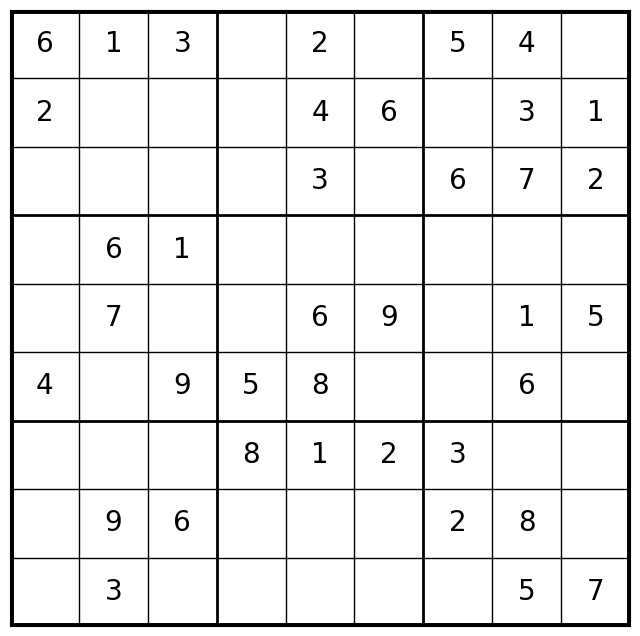

In [7]:
filepath_1 = 'sudokus/sudoku_1.suk'
cargar_sudoku_1 = CargarSudoku(filepath_1)
sudoku_1 = cargar_sudoku_1.cargar()
pintar_sudoku_1 = PintarSudoku(sudoku_1)
pintar_sudoku_1.dibujar_sudoku()

<h3>Algoritmo de Resolución del Sudoku</h3>
Vamos a trabajar el algormitmo que yo (Tever) suelo hacer cuando juego a las aplicaciones de Sudoku. Es un proceso que suelo repetir varias veces y que me permite resolver el Sudoku de una forma lógica.

<h4>Paso 1: Trabajar a nivel de Tablero</h4>
El primer paso que suelo hacer es trabajar a nivel de Tablero y creo las anotaciones de cada celda en ese Tablero. Una vez terminadas las anotaciones reviso que números deben estar en cada celda, si es posible, y ya queda anotado ese número

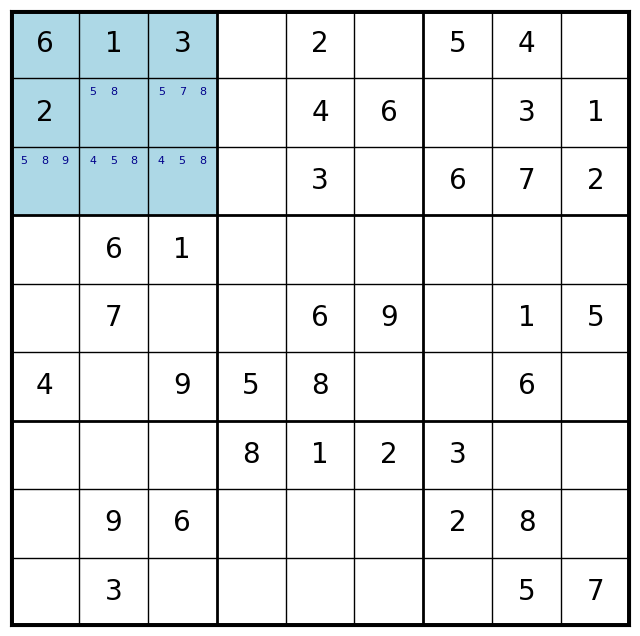

In [9]:
anotaciones_tablero1 = [
    [[], [], [], [], [], [], [], [], []],
    [[], [5,8], [5,7,8], [], [], [], [], [], []],
    [[5,8,9], [4,5,8], [4,5,8], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []]
]

for i in range(9):
    for j in range(9):
        for anotacion in anotaciones_tablero1[i][j]:
            sudoku_1.matriz[i][j].agregar_anotacion(anotacion)
            
pintar_sudoku_1.pintar_tablero(0, 'lightblue')

Si nos fijamos ya podemos anotar el número 9 ya que sólo puede estar en una posición

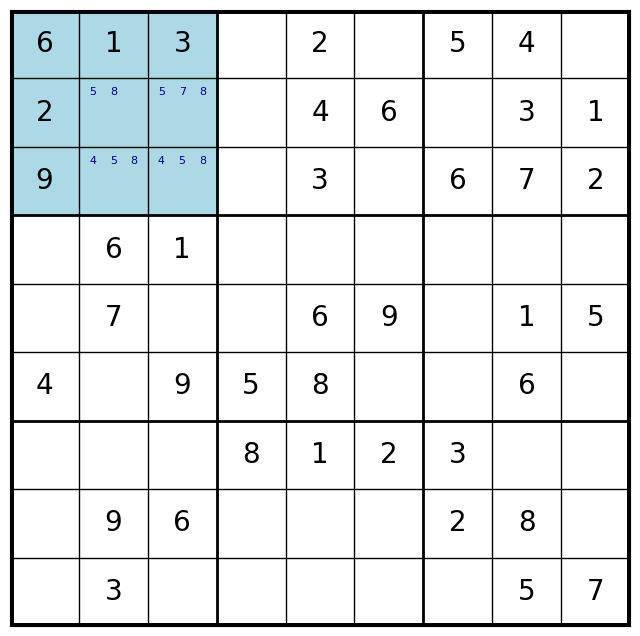

In [10]:
# Posición para el 9 => 2,0
sudoku_1.matriz[2][0].establecer_numero(9)

pintar_sudoku_1.pintar_tablero(0, 'lightblue')

Seguimos con el Tablero 2

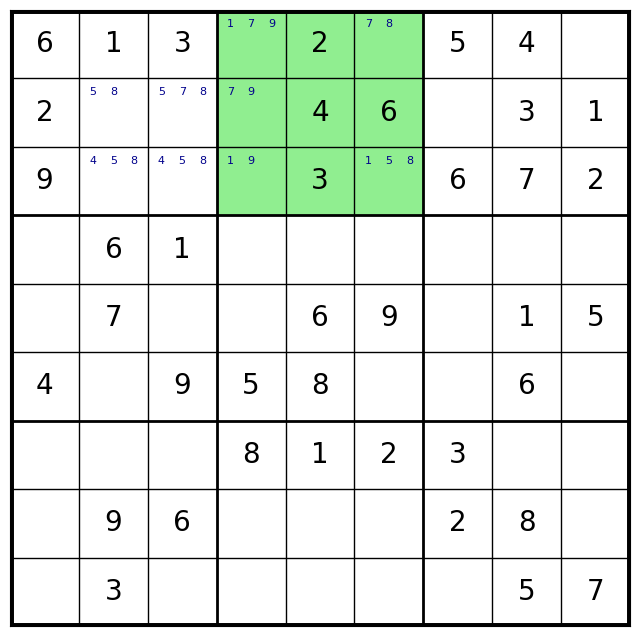

In [11]:
anotaciones_tablero2 = [
    [[], [], [], [1,7,9], [], [7,8], [], [], []],
    [[], [], [], [7,9], [], [], [], [], []],
    [[], [], [], [1,9], [], [1,5,8], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []]
]

for i in range(9):
    for j in range(9):
        for anotacion in anotaciones_tablero2[i][j]:
            sudoku_1.matriz[i][j].agregar_anotacion(anotacion)
            
pintar_sudoku_1.pintar_tablero(1, 'lightgreen')

En este tablero podemos anotar ya los números 5 y 8

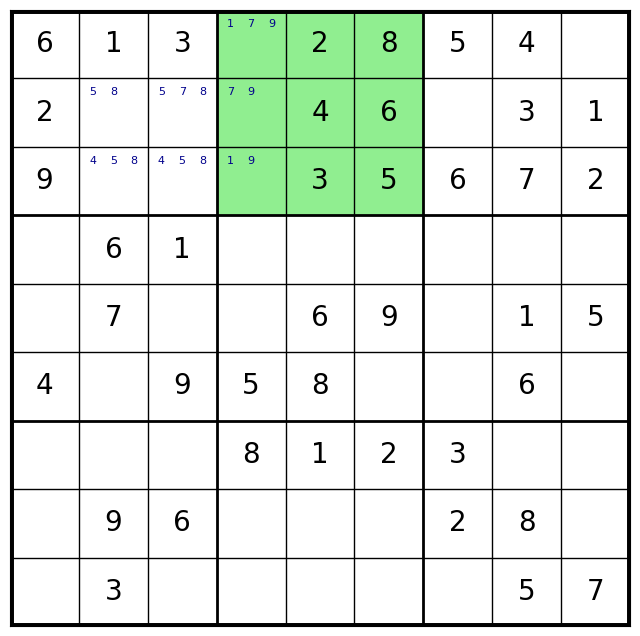

In [12]:
# Posición para el 5 => 2,5
sudoku_1.matriz[2][5].establecer_numero(5)
#Posición para el 1 => 0, 5
sudoku_1.matriz[0][5].establecer_numero(8)

pintar_sudoku_1.pintar_tablero(1, 'lightgreen')

Anotaciones del Tablero 3

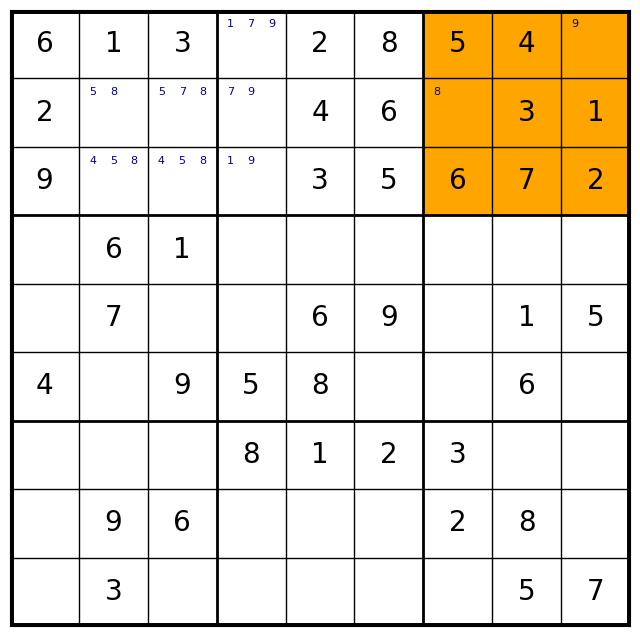

In [13]:
anotaciones_tablero3 = [
    [[], [], [], [], [], [], [], [], [9]],
    [[], [], [], [], [], [], [8], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []]
]

for i in range(9):
    for j in range(9):
        for anotacion in anotaciones_tablero3[i][j]:
            sudoku_1.matriz[i][j].agregar_anotacion(anotacion)
            
pintar_sudoku_1.pintar_tablero(2, 'orange')

Vemos que sólo son el 8 y el 9 cada uno en una celda por lo que procedemos a ponerlos en su sitio

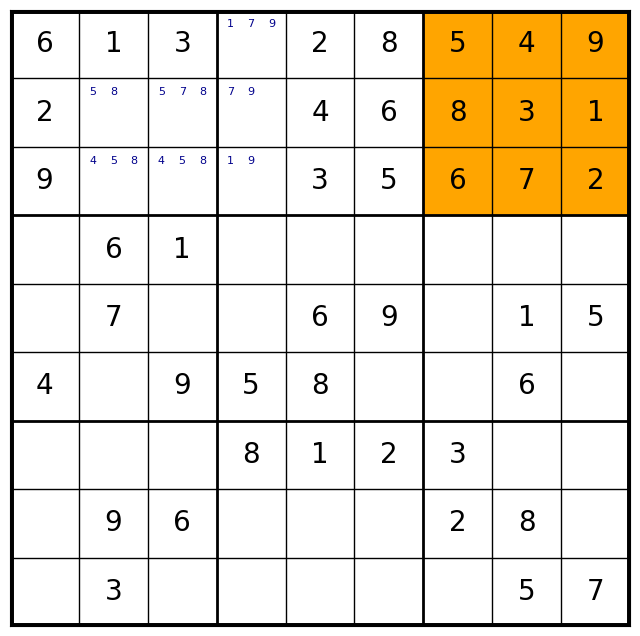

In [14]:
# Posición para el 8 => 1,6
sudoku_1.matriz[1][6].establecer_numero(8)
#Posición para el 9 => 0, 8
sudoku_1.matriz[0][8].establecer_numero(9)

pintar_sudoku_1.pintar_tablero(2, 'orange')

Antes de continuar con el Tablero 4 vamos a limpiar las anotaciones ya que:
<ul>
    <li>Puede haber números que ya se pueden descartar</li>
    <li>Puede haber números que ya se pueden establecer</li>
</ul>
Vamos a ver los cambios que podemos realizar en este paso, vamos a limpiar las anotaciones a nivel de filas:
<ol>
    <li>En la posición [0,0] del Tablero 2 ya se puede poner el 7 que es el último número que nos queda de esa fila</li>
    <li>En la posición [1,0] del Tablero 2 ponemos el 9</li>
    <li>En la posición [2,0] del Tablero 2 ponemos el 1</li>
    <li>En las posiciones [2,1] y [2,2] del Tablero 1 quitamos el 5 de las anotaciones</li>
</ol>

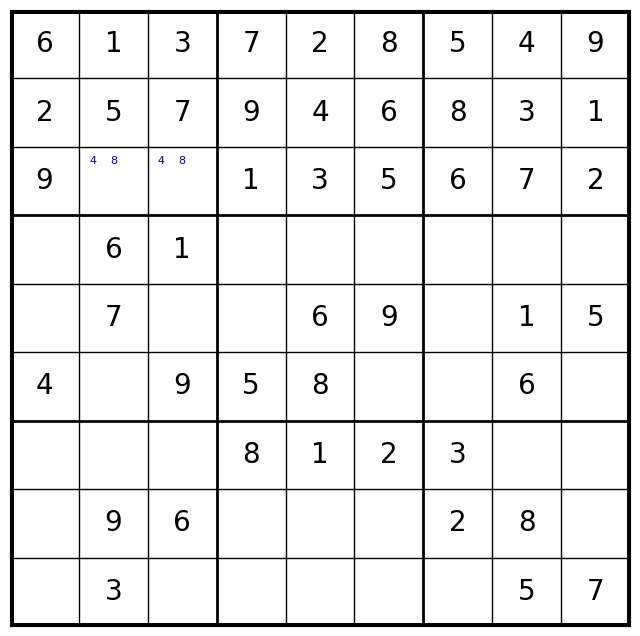

In [15]:
# Posición para el 7 del Tablero 2 => 0,3
sudoku_1.matriz[0][3].establecer_numero(7)
# Posición para el 9 del Tablero 2 => 1,3
sudoku_1.matriz[1][3].establecer_numero(9)
# Posición para el 1 del Tablero 2 => 2,3
sudoku_1.matriz[2][3].establecer_numero(1)
# Posición para el 5 del Tablero 1 => 1,1
sudoku_1.matriz[1][1].establecer_numero(5)
# Posición para el 7 del Tablero 1 => 1,2
sudoku_1.matriz[1][2].establecer_numero(7)
# Eliminamos el 5 de las anotaciones del Tablero 1
sudoku_1.matriz[2][1].eliminar_anotacion(5)
sudoku_1.matriz[2][2].eliminar_anotacion(5)

pintar_sudoku_1.dibujar_sudoku()

Revisamos el Tablero 4 y encontramos las siguientes anotaciones:
<ul>
    <li>El 2 puede ir en las posiciones 1,2 y 2,1 del Tablero 4</li>
    <li>El 3 puede ir en las posiciones 0,0 y 1,0 del Tablero 4</li>
    <li>El 5 puede ir en la posición 0,0 del Tablero 4</li>
    <li>El 8 puede ir en las posiciones 0,0 ; 1,0 y 1,2 del Tablero 4</li>
</ul>

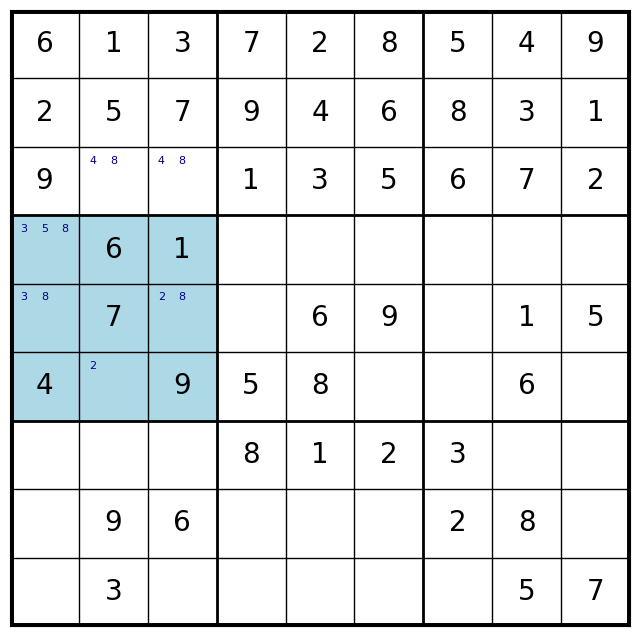

In [16]:
anotaciones_tablero4 = [
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[3,5,8], [], [], [], [], [], [], [], []],
    [[3,8], [], [2,8], [], [], [], [], [], []],
    [[], [2], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []]
]

for i in range(9):
    for j in range(9):
        for anotacion in anotaciones_tablero4[i][j]:
            sudoku_1.matriz[i][j].agregar_anotacion(anotacion)
            
pintar_sudoku_1.pintar_tablero(3, 'lightblue')

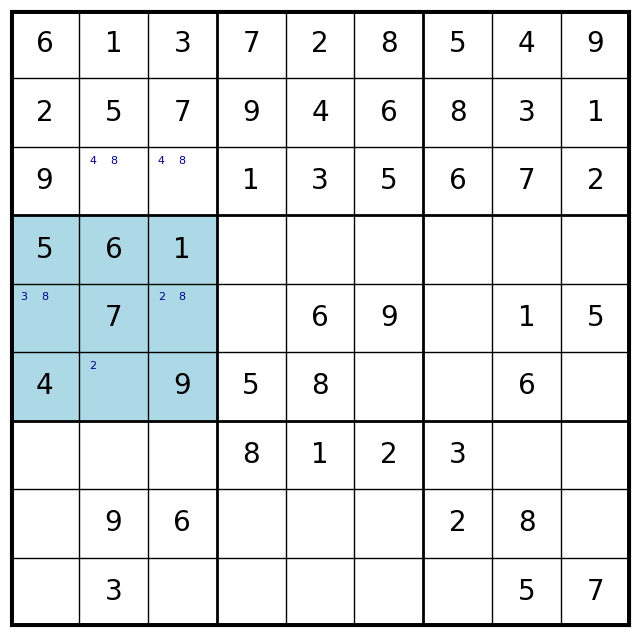

In [17]:
#Podemos asignar el 5 a la posición 3,0 
sudoku_1.matriz[3][0].establecer_numero(5)

pintar_sudoku_1.pintar_tablero(3, 'lightblue')

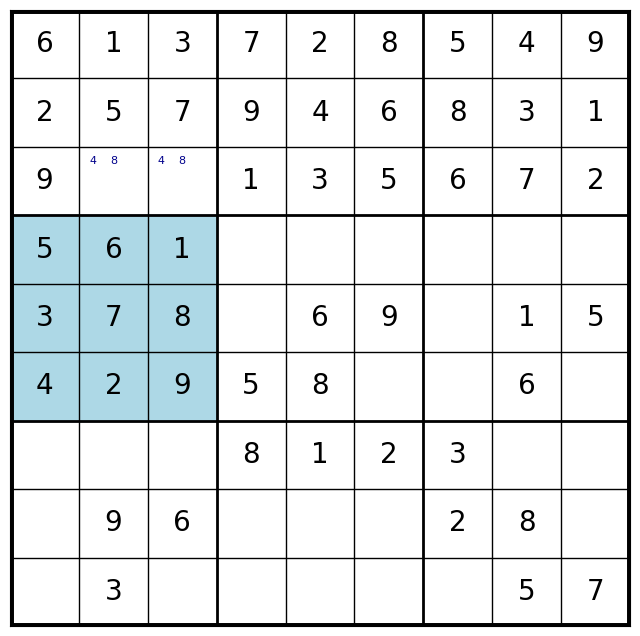

In [18]:
# Podemos resolver el Tablero 4 ya que el 3 sólo tiene una posición
sudoku_1.matriz[4][0].establecer_numero(3)
# Ahora sólo tiene una posición el 8
sudoku_1.matriz[4][2].establecer_numero(8)
# El 2 ya queda sólo y podemos asignar el número a la última posición
sudoku_1.matriz[5][1].establecer_numero(2)

pintar_sudoku_1.pintar_tablero(3, 'lightblue')

Le toca el turno al Tablero 5 y vamos a crear sus anotaciones

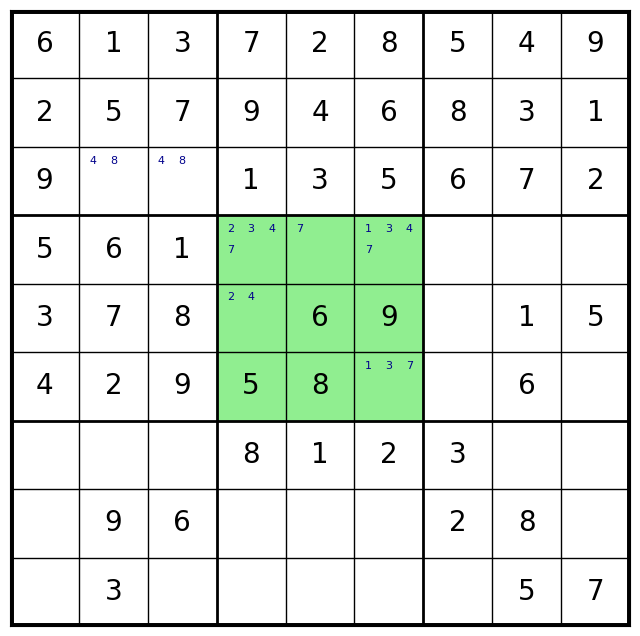

In [19]:
anotaciones_tablero5 = [
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [2,3,4,7], [7], [1,3,4,7], [], [], []],
    [[], [], [], [2,4], [], [1,3,7], [], [], []],
    [[], [], [], [], [], [1,3,7], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []]
]

for i in range(9):
    for j in range(9):
        for anotacion in anotaciones_tablero5[i][j]:
            sudoku_1.matriz[i][j].agregar_anotacion(anotacion)
            
pintar_sudoku_1.pintar_tablero(4, 'lightgreen')

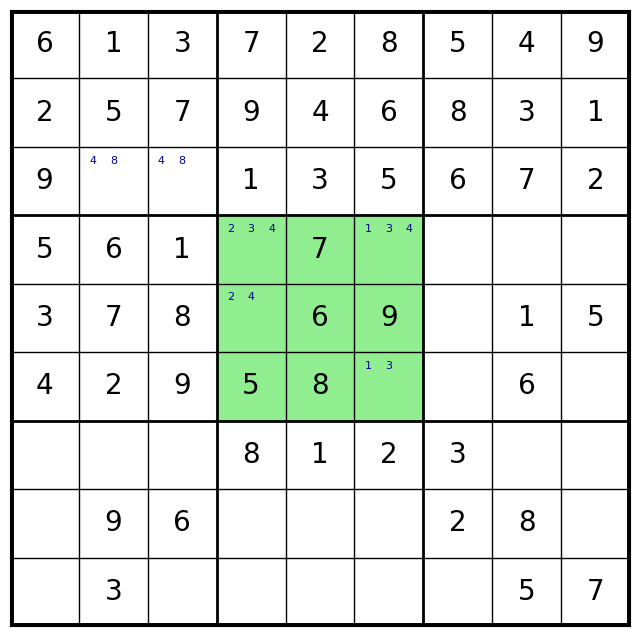

In [20]:
# El único número que podemos resolver del Tablero 5 es el 7 en la posición 3,4
sudoku_1.matriz[3][4].establecer_numero(7)

# Limpiamos las anotaciones del 7 del tablero
sudoku_1.matriz[3][3].eliminar_anotacion(7)
sudoku_1.matriz[3][5].eliminar_anotacion(7)
sudoku_1.matriz[5][5].eliminar_anotacion(7)

pintar_sudoku_1.pintar_tablero(4, 'lightgreen')

Vamos con el Tablero 6 y vamos a anotar los números posibles que tenemos en él

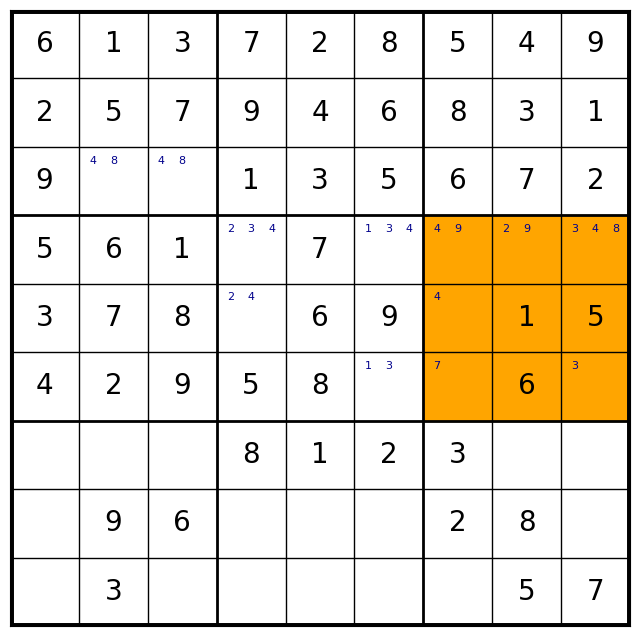

In [21]:
anotaciones_tablero6 = [
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [4,9], [2,9], [3,4,8]],
    [[], [], [], [], [], [], [4], [], []],
    [[], [], [], [], [], [], [7], [], [3]],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []]
]

for i in range(9):
    for j in range(9):
        for anotacion in anotaciones_tablero6[i][j]:
            sudoku_1.matriz[i][j].agregar_anotacion(anotacion)
            
pintar_sudoku_1.pintar_tablero(5, 'orange')

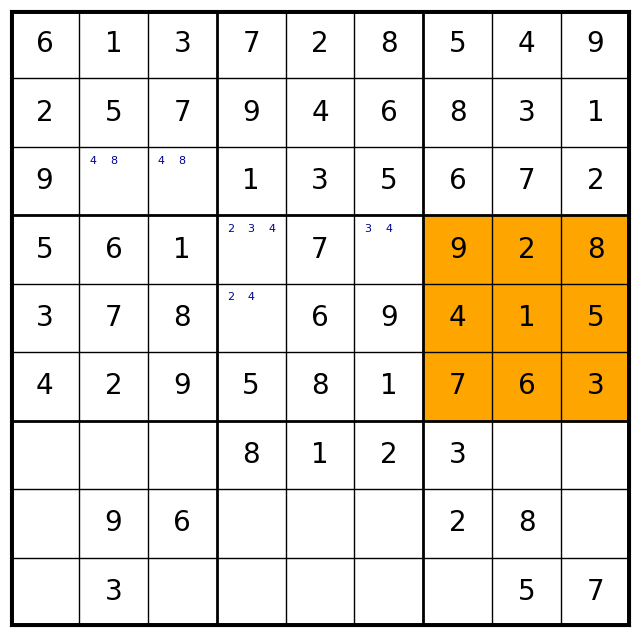

In [22]:
# Vamos a limpiar este tablero que podemos ya establecer varios números
# El 1 del Tablero 5 tiene la posición 5,5
sudoku_1.matriz[5][5].establecer_numero(1)
# Eliminamos anotaciones del Tablero 5 del número 1
sudoku_1.matriz[3][5].eliminar_anotacion(1)
# El 8 del Tablero 6 tiene la posición 3,8
sudoku_1.matriz[3][8].establecer_numero(8)
# El 7 del Tablero 6 tiene la posición 5,6
sudoku_1.matriz[5][6].establecer_numero(7)
# El 3 del Tablero 6 tiene la posición 5,8
sudoku_1.matriz[5][8].establecer_numero(3)
# El 4 del Tablero 6 tiene la posición 4,6
sudoku_1.matriz[4][6].establecer_numero(4)
# El 2 del Tablero 6 tiene la posición 3,7
sudoku_1.matriz[3][7].establecer_numero(2)
# El 9 del Tablero 6 tiene la posición 3,6
sudoku_1.matriz[3][6].establecer_numero(9)

pintar_sudoku_1.pintar_tablero(5, 'orange')

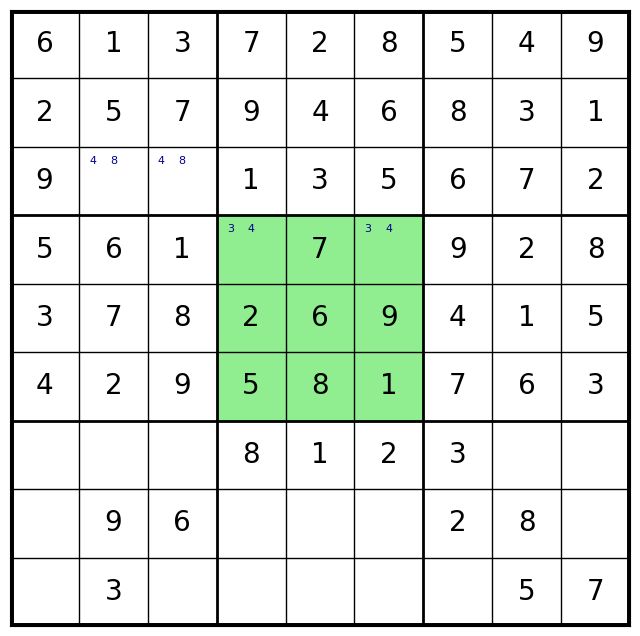

In [23]:
# Vamos a limpiar el Tablero 5
# El 2 del Tablero 5 tiene la posición 3,4
sudoku_1.matriz[4][3].establecer_numero(2)
# Eliminar la anotación del 2 del Tablero 5
sudoku_1.matriz[3][3].eliminar_anotacion(2)

pintar_sudoku_1.pintar_tablero(4, 'lightgreen')

Anotaciones del Tablero 7

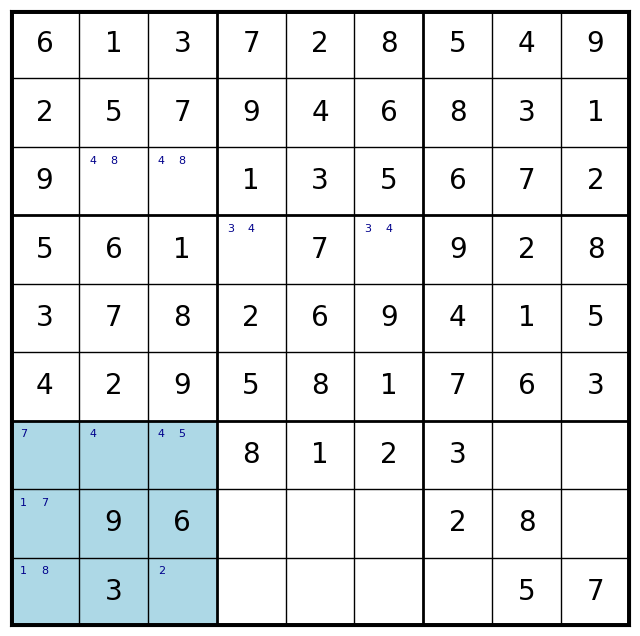

In [24]:
anotaciones_tablero7 = [
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[7], [4], [4,5], [], [], [], [], [], []],
    [[1,7], [], [], [], [], [], [], [], []],
    [[1,8], [], [2], [], [], [], [], [], []]
]

for i in range(9):
    for j in range(9):
        for anotacion in anotaciones_tablero7[i][j]:
            sudoku_1.matriz[i][j].agregar_anotacion(anotacion)
            
pintar_sudoku_1.pintar_tablero(6, 'lightblue')

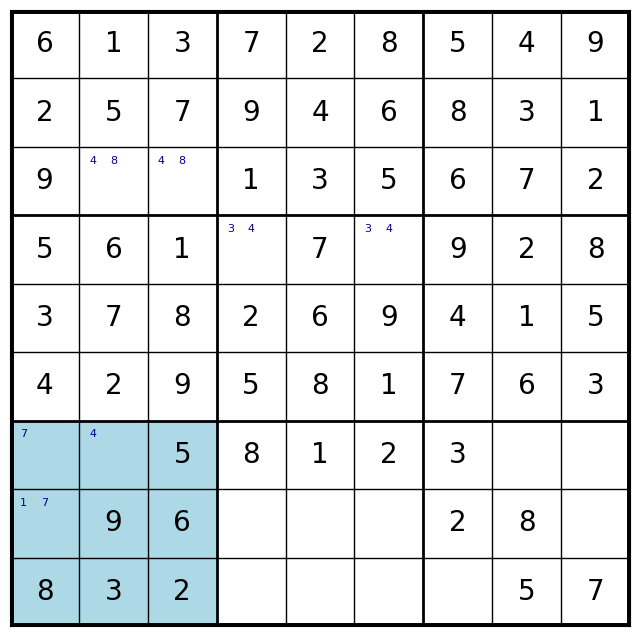

In [25]:
# Vamos a asignar los números que sabemos que ya tienen posición

# El 2 del Tablero 7 tiene la posición 8,2
sudoku_1.matriz[8][2].establecer_numero(2)
# El 5 del Tablero 7 tiene la posición 6,2
sudoku_1.matriz[6][2].establecer_numero(5)
# El 8 del Tablero 7 tiene la posición 8,0
sudoku_1.matriz[8][0].establecer_numero(8)

pintar_sudoku_1.pintar_tablero(6, 'lightblue')

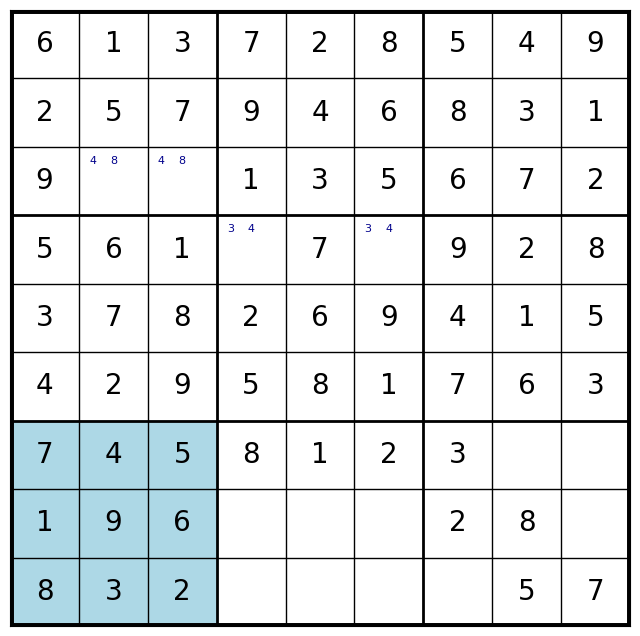

In [26]:
# Volviendo a repasar podemos cerrar el tablero 7

# El 7 del Tablero 7 tiene la posición 6,0
sudoku_1.matriz[6][0].establecer_numero(7)
# El 4 del Tablero 7 tiene la posición 6,1
sudoku_1.matriz[6][1].establecer_numero(4)
# El 1 del Tablero 7 tiene la posición 7,0
sudoku_1.matriz[7][0].establecer_numero(1)

pintar_sudoku_1.pintar_tablero(6, 'lightblue')

Casi estamos terminando, vamos  las anotaciones del Tablero 8

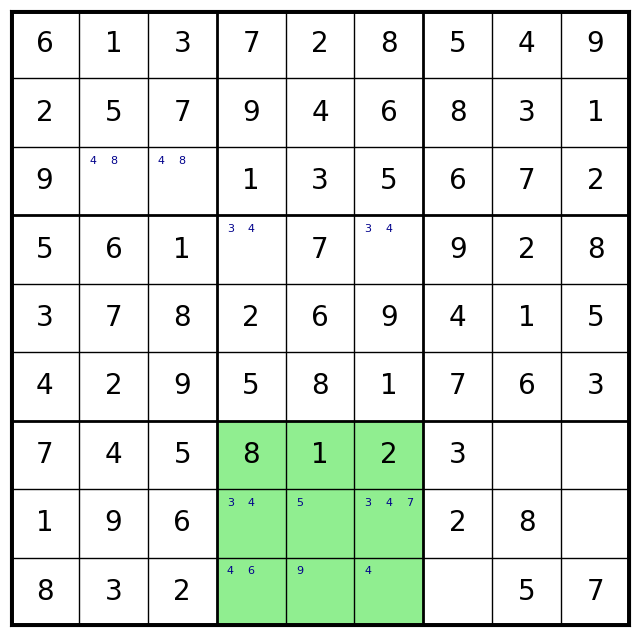

In [27]:
anotaciones_tablero8 = [
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [3,4], [5], [3,4,7], [], [], []],
    [[], [], [], [4,6], [9], [4], [], [], []]
]

for i in range(9):
    for j in range(9):
        for anotacion in anotaciones_tablero8[i][j]:
            sudoku_1.matriz[i][j].agregar_anotacion(anotacion)
            
pintar_sudoku_1.pintar_tablero(7, 'lightgreen')

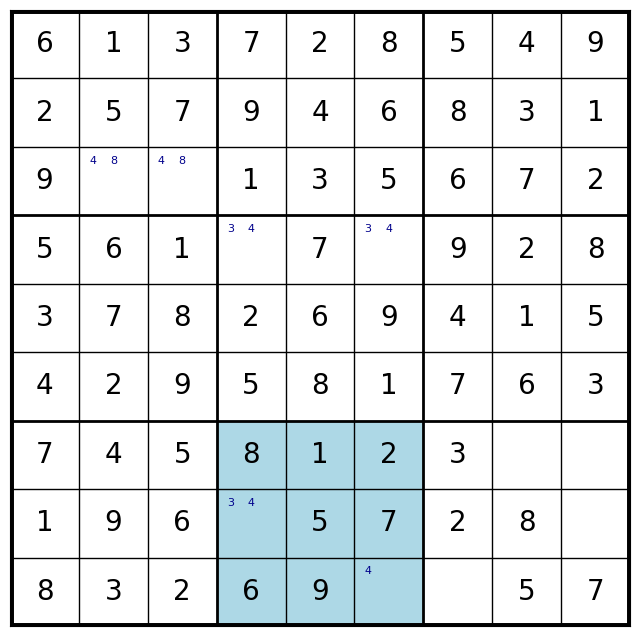

In [28]:
# Volviendo a repasar podemos ir cerrando el tablero 8

# El 9 del Tablero 8 tiene la posición 8,4
sudoku_1.matriz[8][4].establecer_numero(9)
# El 5 del Tablero 8 tiene la posición 7,4
sudoku_1.matriz[7][4].establecer_numero(5)
# El 7 del Tablero 8 tiene la posición 7,5
sudoku_1.matriz[7][5].establecer_numero(7)
# El 6 del Tablero 8 tiene la posición 8,3
sudoku_1.matriz[8][3].establecer_numero(6)

pintar_sudoku_1.pintar_tablero(7, 'lightblue')

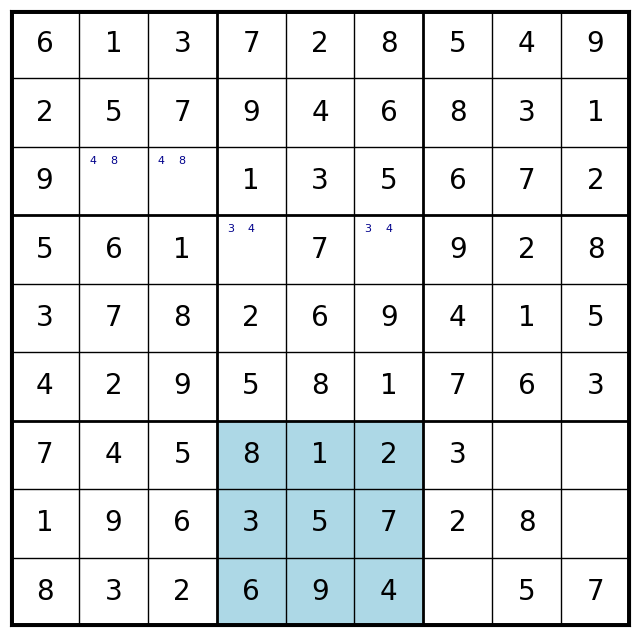

In [29]:
# Vamos a cerrar el 3 y el 4 en el Tablero 8

# El 3 del Tablero 8 tiene la posición 7,3
sudoku_1.matriz[7][3].establecer_numero(3)
# El 4 del Tablero 8 tiene la posición 8,5
sudoku_1.matriz[8][5].establecer_numero(4)

pintar_sudoku_1.pintar_tablero(7, 'lightblue')

Y ya terminamos con las anotaciones del Tablero 9

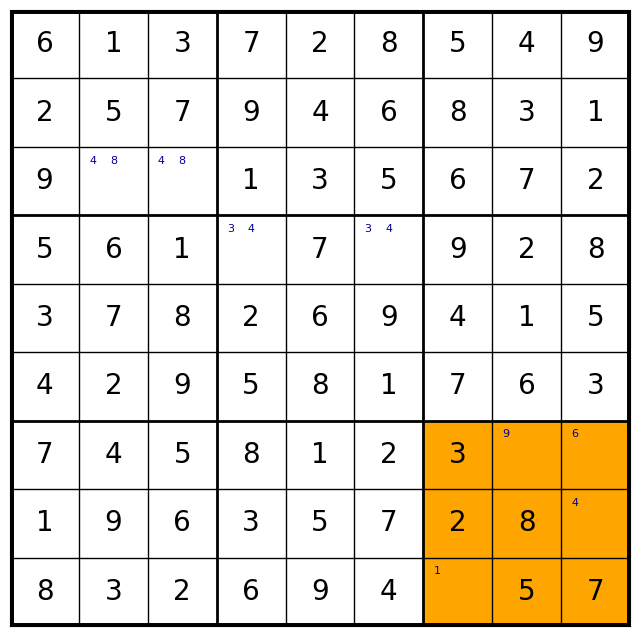

In [30]:
anotaciones_tablero9 = [
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [], []],
    [[], [], [], [], [], [], [], [9], [6]],
    [[], [], [], [], [], [], [], [], [4]],
    [[], [], [], [], [], [], [1], [], []]
]

for i in range(9):
    for j in range(9):
        for anotacion in anotaciones_tablero9[i][j]:
            sudoku_1.matriz[i][j].agregar_anotacion(anotacion)
            
pintar_sudoku_1.pintar_tablero(8, 'orange')

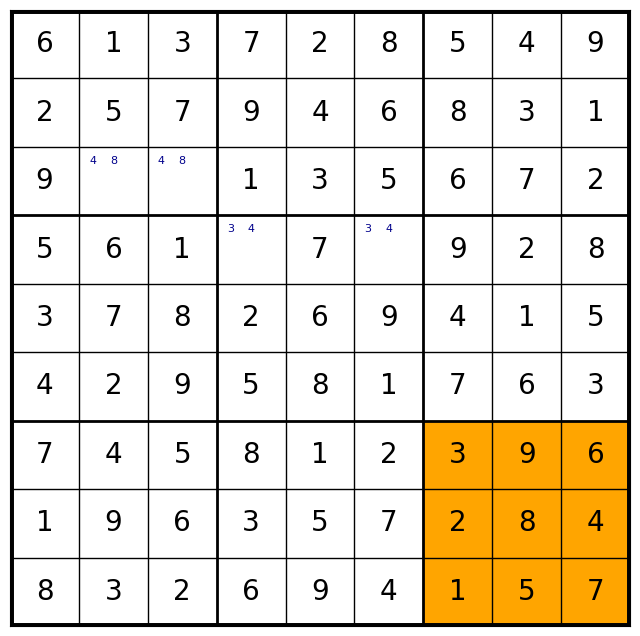

In [31]:
# Vemos que ya son las posiciones que deben tener los números por lo que as establecemos

# El 9 del Tablero 9 tiene la posición 6,7
sudoku_1.matriz[6][7].establecer_numero(9)
# El 6 del Tablero 9 tiene la posición 6,8
sudoku_1.matriz[6][8].establecer_numero(6)
# El 4 del Tablero 9 tiene la posición 7,8
sudoku_1.matriz[7][8].establecer_numero(4)
# El 1 del Tablero 9 tiene la posición 8,6
sudoku_1.matriz[8][6].establecer_numero(1)

pintar_sudoku_1.pintar_tablero(8, 'orange')

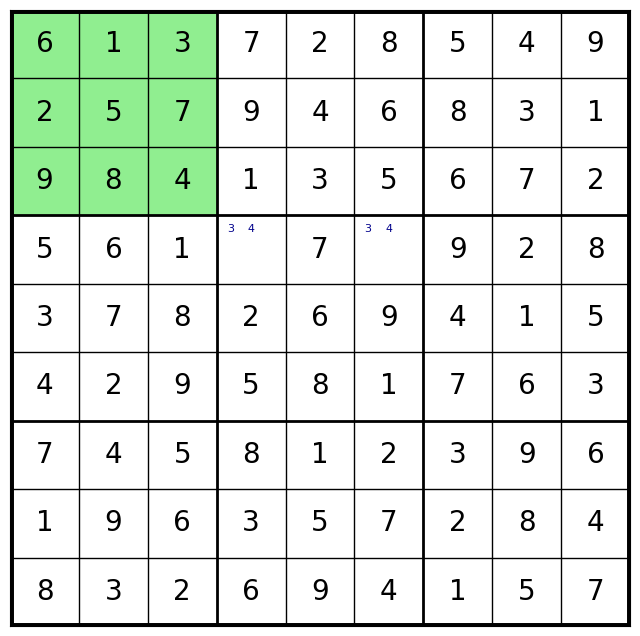

In [32]:
# Resolvemos Tablero 1

# El 4 del Tablero 1 tiene la posición 2,2
sudoku_1.matriz[2][2].establecer_numero(4)
# El 8 del Tablero 1 tiene la posición 2,1
sudoku_1.matriz[2][1].establecer_numero(8)

pintar_sudoku_1.pintar_tablero(0, 'lightgreen')

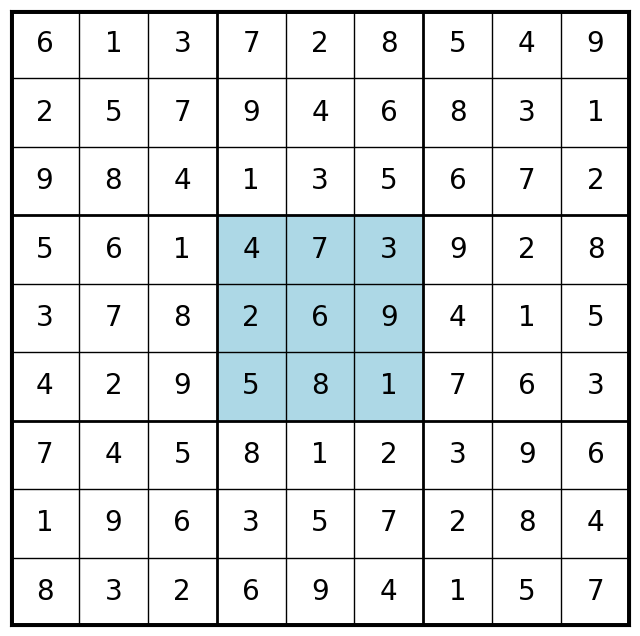

In [33]:
# Resolvemos Tablero 5

# El 4 del Tablero 5 tiene la posición 3,3
sudoku_1.matriz[3][3].establecer_numero(4)
# El 3 del Tablero 5 tiene la posición 3,5
sudoku_1.matriz[3][5].establecer_numero(3)

pintar_sudoku_1.pintar_tablero(4, 'lightblue')

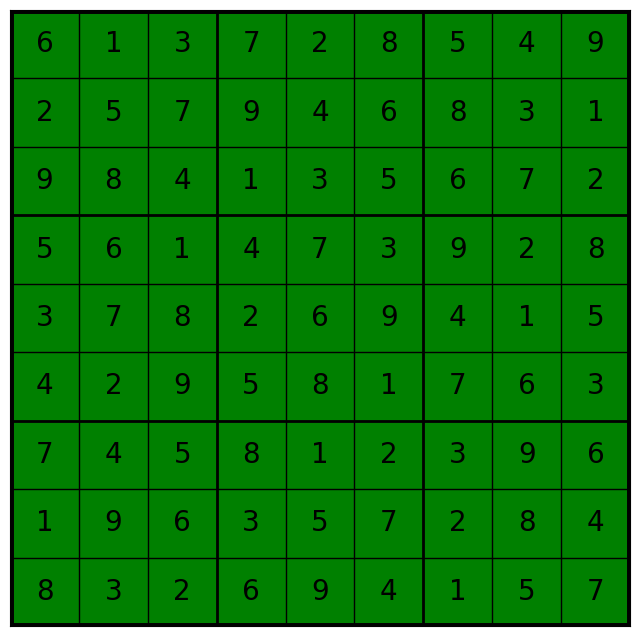

In [34]:
# Vamos a verificiar si el Sudoku está correctamente resuelto
if sudoku_1.es_sudoku_resuelto:
    pintar_sudoku_1.dibujar_sudoku(color_celda='green')
else:
    pintar_sudoku_1.dibujar_sudoku(color_celda='red')

<h3>Siguientes Pasos</h3>
En este ejemplo de Sudoku sencillo pudimos resolver todo el problema con una sola pasada por los tableros y haciendo limpieza. Los siguientes pasos sería hacer limpieza por filas y columnas para volver a limpiar por Tableros.
<br><br>
En Sudokus difíciles es posible que lleguemos a un punto en el cual no se pueda avanzar ya que podría haber varias soluciones a ese escenario.